In [ ]:
# Alex Pascarella (PhD Student)
# University of Illinois Urbana-Champaign
# AE508 - Optimal Space Trajectories
# Last revision: 02/27/2022

In [284]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares, root, fsolve
from scipy.integrate import solve_ivp

In [285]:
# Dynamics
def ode_function(t, z, a, b):

    # Unpack input
    x, y = z[0:2]
    lam_x, lam_y = z[2:4]
    
    # State derivative
    x_dot = np.array([y, -a**2*x + b*y - lam_y]);

    # Costate derivative
    lam_dot = np.array([a**2*lam_y, -(lam_x + b*lam_y)]);
    
    return np.hstack([x_dot, lam_dot])

In [286]:
# Cost function
def cost_function(lam0, tspan, x0, xf, a, b, rtol=3e-14, atol=3e-14, debug=True):

    # Integrate dynamics
    z0 = np.hstack([x0, lam0])
    traj = solve_ivp(ode_function, tspan, z0, method='DOP853', args=(a, b), rtol=rtol, atol=atol)

    # Compute cost
    cost = traj.y[0:2, -1] - xf
    
    # Print function value
    if debug:
        print("Error norm: {}".format(np.linalg.norm(cost)))
        
    # Return output
    return cost

In [289]:
# Hamiltonian
def hamiltonian_function(t, z, a, b):

    # Preallocate output
    H = np.zeros(z.shape[1])
    
    # Compute Hamiltonian
    for i in range(z.shape[1]):        
        dz = ode_function(t[i], z[:, i], a, b)     
        H[i] = np.dot(z[2:4, i], dz[0:2]) + 0.5*z[3, i]**2
        
    # Return output
    return H

In [290]:
# Boundary conditions
x0, xf = np.array([1, 1]), np.array([2, 3])
tspan = (0, 12)

# Constants
a, b = (0.5, 0.1)

# Costate guess
lam0 = np.array([0.1, 0.1])

# Solve optimal control problem
lam0 = root(cost_function, lam0, args=(tspan, x0, xf, a, b), method='lm', options={'xtol': 1e-14, 'ftol': 1e-14}).x

# Integrate converged solution
z0 = np.hstack([x0, lam0])
traj = solve_ivp(ode_function, tspan, z0, method='LSODA', args=(a, b), rtol=3e-14, atol=3e-14)
H = hamiltonian_function(traj.t, traj.y, a, b)

Error norm: 4.045319698070989
Error norm: 4.045319698070989
Error norm: 4.045319698070989
Error norm: 4.045319734242301
Error norm: 4.04531969716662
Error norm: 2.3554448161406054e-07
Error norm: 2.6343592410562487e-07
Error norm: 2.314251465495714e-07
Error norm: 2.863256355534615e-14
Error norm: 2.8072885882788957e-08
Error norm: 1.368920536380319e-08
Error norm: 3.233018248352212e-15
Error norm: 2.8072861247379497e-08
Error norm: 1.3689227332650401e-08
Error norm: 3.3893637946200144e-15


Text(0.5, 0, 't')

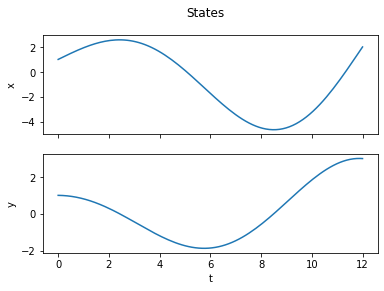

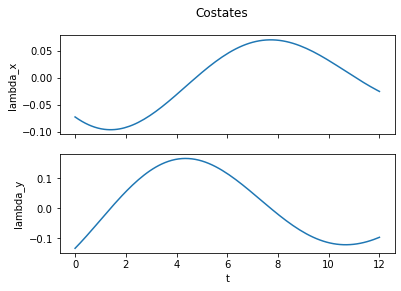

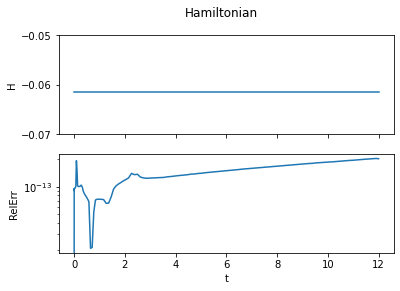

In [291]:
# Plot states
fig0, ax0 = plt.subplots(2, 1, sharex=True)
fig0.suptitle('States')
ax0[0].plot(traj.t, traj.y[0, :])
ax0[1].plot(traj.t, traj.y[1, :])
ax0[0].set_ylabel('x')
ax0[1].set_ylabel('y')
ax0[1].set_xlabel('t')

# Plot costates
fig1, ax1 = plt.subplots(2, 1, sharex=True)
fig1.suptitle('Costates')
ax1[0].plot(traj.t, traj.y[2, :])
ax1[1].plot(traj.t, traj.y[3, :])
ax1[0].set_ylabel('lambda_x')
ax1[1].set_ylabel('lambda_y')
ax1[1].set_xlabel('t')

# Plot Hamiltonian
fig2, ax2 = plt.subplots(2, 1, sharex=True)
fig2.suptitle('Hamiltonian')
ax2[0].plot(traj.t, H)
ax2[0].set_ylim(-0.07, -0.05)
ax2[1].semilogy(traj.t, np.abs((H-H[0])/H[0]))
ax2[0].set_ylabel('H')
ax2[1].set_ylabel('RelErr')
ax2[1].set_xlabel('t')